## Agenda

- How to **rescale data** for PCA and clustering methods
- How do I implement **principal component analysis** 
- How can I use PCA for **linear regressions**

As main data we are going to use the returns of 2,000 hedge fund managers over 50 months. The data are from James et al. "An Introduction to Statistical Learning: 2nd ed." (2021). 

In [1]:
import pandas as pd

df = pd.read_csv(r'Fund.csv', index_col = 0)
df.describe()

,Manager1,Manager2,Manager3,Manager4,Manager5,Manager6,Manager7,Manager8,Manager9,Manager10,...,Manager1991,Manager1992,Manager1993,Manager1994,Manager1995,Manager1996,Manager1997,Manager1998,Manager1999,Manager2000
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,3.000000,-0.100000,2.800000,0.500000,0.300000,4.034479,-3.894443,-3.197900,1.618893,3.740106,...,1.234259,-0.330417,0.707515,0.092912,-0.066817,-0.026088,0.911164,0.366860,-0.389842,0.196968
std,7.416198,6.855655,7.549834,6.708204,6.782330,8.121927,9.284309,6.674823,3.607509,8.400806,...,9.055526,4.974683,7.714913,2.662394,3.456454,1.495728,7.943628,1.101723,3.689598,5.017458
min,-13.548972,-12.038772,-13.342552,-13.796156,-13.054242,-18.121510,-29.998023,-17.983874,-7.166604,-16.652256,...,-14.122046,-11.522314,-12.631190,-5.488721,-10.268017,-3.474257,-20.119865,-1.977991,-8.547683,-11.407383
25%,-1.368724,-4.624053,-3.408768,-4.968537,-4.323646,0.531786,-10.478775,-7.962793,-1.208462,-3.059452,...,-4.553318,-2.702142,-5.297593,-2.128047,-2.227580,-1.232428,-3.649233,-0.434230,-2.720154,-3.712282
50%,2.298907,-1.389781,4.210533,0.478584,-0.107457,3.129916,-2.733464,-4.411160,1.966181,3.900450,...,-0.585345,-0.555915,0.694856,0.168904,0.172707,0.182896,-0.181650,0.249682,-0.372109,1.099798
75%,7.659399,5.792869,8.273102,5.966888,3.421845,9.496908,3.034117,2.351974,4.151087,8.314393,...,7.549238,2.999956,5.868618,2.130024,2.134950,0.846596,6.214012,1.264606,1.511977,3.639970
max,16.272040,12.525254,17.006044,16.371866,17.159553,19.246190,15.092433,11.186211,7.814687,22.694019,...,24.995252,10.689669,19.773675,4.594854,7.026726,2.848785,19.345970,2.488612,10.510394,10.418316


### Extract the first 10 principal components

The goal is to find evidence of some sort of commonality across hedge fund performances. This is done by extracting a limited number of principal components $K<p$ with $p$ the number of funds, and see how much cross sectional variation is explained by the first $K$ components. Before doing any actual calculation, we need to check first if there is any missing data or **NaN** observations. 

In [4]:
import numpy as np

df.replace([np.inf, -np.inf], np.nan, inplace=True)
#inplace=True: do not need to create a new df, will replace old df automatically
df = df.dropna(axis = 0, how ='any') 

Now we need to re-scale the data so that the performance of each fund is on the same scale. To do that, we need to import the **StandardScaler** object from the **sklearn** package. StandardScaler is part of the **preprocessing** routines. 

In [3]:
from sklearn.preprocessing import StandardScaler

Now we can re-scale the performances by using the command **.fit_transform(X)** 

In [5]:
X = StandardScaler().fit_transform(df)

Then we can now extract the first 10 principal components using the **sklearn** package

In [6]:
import numpy as np
from sklearn.decomposition import PCA

#define the number of principal components that will be used
pca = PCA(n_components=10)

#find the principal components from the scaled data
principalComponents = pca.fit_transform(X)

#convert the output from the components into a dataframe
principaldf         = pd.DataFrame(data = principalComponents, columns = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])

Since we wish to predict the charged off mortgages out of sample, we need to split the sample of observations between those that will be used for training/validation and those which will be used for testing. This is done using the command *train_test_split*. 

In [7]:
principaldf.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,-16.367609,-3.567136,-2.103279,5.504508,-4.443685,-2.337115,3.062384,-0.579750,9.950901,-0.474382
1,-1.204325,7.682149,-4.293024,5.101392,-4.539027,11.618988,6.150542,-5.579060,-5.748803,-4.162949
2,2.922772,0.841214,7.255455,8.628769,-3.432341,4.270166,8.110854,-2.182678,-1.741571,-4.452880
3,5.107706,12.903343,-3.698864,-6.314772,7.841555,-11.110407,-4.569605,2.392313,3.900112,-10.906243
4,2.279004,-10.134577,6.847389,6.309748,9.484381,-0.108237,19.055074,10.348927,6.275877,-2.977651


### Check the variance explained by the first 10 principal components

We can verify the amount of variance explained by the first ten principal components by using simple visualization tools. 

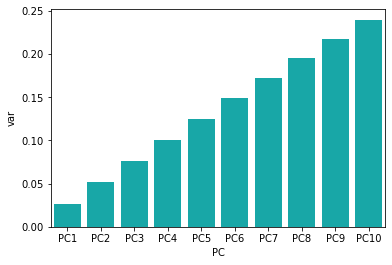

In [8]:
import seaborn as sns
import numpy as np

# .explained_variance_ratio_: returna an array of values
# then we calculate the cumulative variance ratio using np.cumsum

# create a dataframe with 2 columns
# first have the cumulative variance ratio
# second have the names of each principal component
pc = pd.DataFrame({'var':np.cumsum(pca.explained_variance_ratio_),
             'PC':['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']})

# plot a bar-plot
sns.barplot(x='PC',y="var", 
           data=pc, color="c");

It seems that the first ten principal components explain a very small fraction of the cross sectional variation in funds performances. In total, the first 10 principal components explains roughly 25% of the variation in the funds performances. 

This essentially shows that the performance of hedge funds is only moderately correlated and there is significant idiosyncracies, or perhaps more clustered correlations which cannot be simply captured by PCA. 

### Principal component regression

We can now show how PCA can be used to implement a predictive regression. For illustration purposes, we are going to use the same data on hedge funds. The goal would be to predict the returns on all funds based on the first ten principal components.  

In [11]:
from sklearn.linear_model import LinearRegression
# import randint
from sklearn.multioutput import MultiOutputRegressor
from random import randint

#define X and Y
X    = principaldf;
y    = df;

# fit a multi-regression model
# y does not have a single column but many, so instead of going on and fitting
# a regression model for every hedge fund we fit a model across all ys using the same xs
model = MultiOutputRegressor(LinearRegression())
model.fit(X, y)

# get the predicted values from the fitted model
yhat = model.predict(X)

We can now assess and plot the explanatory power of each principal component in an $R^2$ sense. The function **r2_score** reports the average $R^2$ across funds.  

In [12]:
from sklearn.metrics import r2_score
r2 = round(r2_score(y, yhat),2)
print(r2)

0.24


This means that, on average, the first 10 principal components explain 24% of the variation in the data. Notice this is almost equivalent to the figure we draw showing the explained variance, as indeed it should be. 